# Project: Predicting patients turnup for an event.

In [29]:
#Basics
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plot
import seaborn as sns
import matplotlib.pyplot as plt

#SKLearn ML
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [30]:
# loading dataset
preprocessed = pd.read_csv('../data/preprocessed.csv')
preprocessed.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day,Age_groups
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,4,6,4,6,4
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,4,6,4,6,4
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,4,6,4,6,4
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,4,6,4,6,1
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,4,6,4,6,4


In [31]:
preprocessed.Neighbourhood.nunique()

81

In [32]:
# creating a copy before preprocessing
df = preprocessed.copy()

In [33]:
# drop Neighbourhood due to its large categories
df.drop(['Neighbourhood'], axis=1, inplace=True)

In [34]:
# encode gender column to be '0' (Male) and '1' (Female)
df['Gender'] = df['Gender'].replace(['M', 'F'], ['0', '1'])

In [35]:
# searching for correlation amongst columns
df.corr().style.background_gradient(cmap='coolwarm')

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Show,scheduled_month,scheduled_day,appointment_month,appointment_day,Age_groups
Age,1.000000,-0.092463,0.504586,0.292391,0.095810,0.078032,0.012633,0.060327,-0.003016,0.011381,0.014572,0.003068,0.958435
Scholarship,-0.092463,1.000000,-0.019730,-0.024894,0.035022,-0.008587,0.001192,-0.029134,0.016817,-0.004967,-0.002583,-0.000677,-0.096187
Hipertension,0.504586,-0.019730,1.000000,0.433085,0.087970,0.080083,-0.006270,0.035704,0.025000,0.000679,0.003786,0.003449,0.489007
Diabetes,0.292391,-0.024894,0.433085,1.000000,0.018473,0.057530,-0.014552,0.015181,0.025600,-0.000387,0.003745,0.006611,0.287269
Alcoholism,0.095810,0.035022,0.087970,0.018473,1.000000,0.004647,-0.026149,0.000197,0.028774,0.006628,0.003922,0.002699,0.104546
Handcap,0.078032,-0.008587,0.080083,0.057530,0.004647,1.000000,-0.024162,0.006077,0.014955,0.000610,-0.001477,0.004350,0.063762
SMS_received,0.012633,0.001192,-0.006270,-0.014552,-0.026149,-0.024162,1.000000,-0.126428,-0.294083,0.078548,0.108082,-0.089867,0.016392
Show,0.060327,-0.029134,0.035704,0.015181,0.000197,0.006077,-0.126428,1.000000,0.160856,-0.006014,0.020879,-0.001158,0.063971
scheduled_month,-0.003016,0.016817,0.025000,0.025600,0.028774,0.014955,-0.294083,0.160856,1.000000,-0.031724,0.527615,-0.043002,-0.002941
scheduled_day,0.011381,-0.004967,0.000679,-0.000387,0.006628,0.000610,0.078548,-0.006014,-0.031724,1.000000,-0.038686,0.328790,0.009382


In [36]:
# then remove some of the independent variables that are highly correlated and would cause problems with the algorithm due to multicollinearity
# drop Neighbourhood due to its large categories
df.drop(['Age'], axis=1, inplace=True)

In [37]:
df.columns.values

array(['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
       'Handcap', 'SMS_received', 'Show', 'scheduled_month',
       'scheduled_day', 'appointment_month', 'appointment_day',
       'Age_groups'], dtype=object)

In [38]:
# separate x_inputs and y_targets variables
y_targets = df.Show
x_inputs = df[['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 
            'scheduled_month', 'scheduled_day', 'appointment_month', 'appointment_day', 'Age_groups']]

In [39]:
# create an object to subtract the mean and divide by the SD featurewise
show_scalar = StandardScaler()

In [40]:
show_scalar.fit(x_inputs)

StandardScaler()

In [41]:
scaled_inputs = show_scalar.transform(x_inputs)

In [42]:
scaled_inputs.shape

(110526, 12)

In [43]:
# spilting the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(scaled_inputs, y_targets, train_size=0.8, random_state= 100)

In [44]:
# view output shapes
print("X_train:", x_train.shape)
print("X_test:", x_test.shape)
print("Y_train:", len(y_train))
print("Y_train:", len(y_test))

X_train: (88420, 12)
X_test: (22106, 12)
Y_train: 88420
Y_train: 22106


In [45]:
#Declare a logistic regression classifier
classifier = LogisticRegression(solver='liblinear',C=0.05, max_iter=1000).fit(x_train, y_train)

In [46]:
#Make predictions on test data
pred = classifier.predict(x_test)

# evaluate the model accuracy
classifier.score(x_train,y_train)

0.7969916308527483

In [56]:
classifier.score(x_test, y_test)

0.7954853885822853

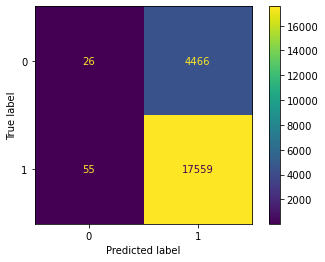

In [59]:
plot_confusion_matrix(classifier, x_test, y_test)

In [48]:
# finding the intercept and coefficient 
print(classifier.intercept_)
classifier.coef_

[1.43922335]


array([[-0.00813849, -0.06675065,  0.00989579, -0.03103496, -0.0335968 ,
        -0.00253765, -0.16361255,  0.41694412,  0.00565832, -0.14129688,
        -0.00771561,  0.1734392 ]])

In [49]:
feature_name = x_inputs.columns.values
feature_name

array(['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism',
       'Handcap', 'SMS_received', 'scheduled_month', 'scheduled_day',
       'appointment_month', 'appointment_day', 'Age_groups'], dtype=object)

In [50]:
#creating a dataframe to contain the feature_names and the corresponding coefficient
summary_table = pd.DataFrame (columns=['feature name'], data = feature_name)

# matching the names with the coeffiecient
summary_table['coefficient'] =np.transpose(classifier.coef_) #transpose because ndarrays are rows not columns
summary_table

,feature name,coefficient
0,Gender,-0.008138
1,Scholarship,-0.066751
2,Hipertension,0.009896
3,Diabetes,-0.031035
4,Alcoholism,-0.033597
5,Handcap,-0.002538
6,SMS_received,-0.163613
7,scheduled_month,0.416944
8,scheduled_day,0.005658
9,appointment_month,-0.141297


In [51]:
# appending the intercept
# to shift the index of thee summary table so that the intercept comes first
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['intercept', classifier.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,feature name,coefficient
0,intercept,1.439223
1,Gender,-0.008138
2,Scholarship,-0.066751
3,Hipertension,0.009896
4,Diabetes,-0.031035
5,Alcoholism,-0.033597
6,Handcap,-0.002538
7,SMS_received,-0.163613
8,scheduled_month,0.416944
9,scheduled_day,0.005658


In [52]:
# find the exponentials of the coefficient, to make them more interpretable
summary_table['odds_ratio'] = np.exp(summary_table.coefficient)
summary_table

,feature name,coefficient,odds_ratio
0,intercept,1.439223,4.217419
1,Gender,-0.008138,0.991895
2,Scholarship,-0.066751,0.935428
3,Hipertension,0.009896,1.009945
4,Diabetes,-0.031035,0.969442
5,Alcoholism,-0.033597,0.966961
6,Handcap,-0.002538,0.997466
7,SMS_received,-0.163613,0.849071
8,scheduled_month,0.416944,1.517318
9,scheduled_day,0.005658,1.005674


In [53]:
# sort the dataframe by the 'odds_ratio' column
summary_table.sort_values('odds_ratio', ascending = False)


,feature name,coefficient,odds_ratio
0,intercept,1.439223,4.217419
8,scheduled_month,0.416944,1.517318
12,Age_groups,0.173439,1.189388
3,Hipertension,0.009896,1.009945
9,scheduled_day,0.005658,1.005674
6,Handcap,-0.002538,0.997466
11,appointment_day,-0.007716,0.992314
1,Gender,-0.008138,0.991895
4,Diabetes,-0.031035,0.969442
5,Alcoholism,-0.033597,0.966961


## Testing Model

In [54]:
classifier.score(x_test,y_test)

0.7954853885822853